In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv('MarathonData.csv')
df

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
5,6,Prague17,David Pecina,M40,42.2,13.612903,NaN,1.32,2.78,A
6,7,Prague17,Tomas Drabek,M40,89.0,12.594340,NaN,1.38,2.81,A
7,8,Prague17,Jan Rada,M45,106.0,12.694611,NaN,1.41,2.84,A
8,9,Prague17,Tomas Drabek,MAM,70.0,13.770492,ciclista 1h,1.38,2.83,A
9,10,Prague17,martin ?indel ?,M45,84.2,13.365079,NaN,1.35,2.86,A


In [3]:
#ran a check to see the type of data I am working with 
df.dtypes

id                 int64
Marathon          object
Name              object
Category          object
km4week          float64
sp4week          float64
CrossTraining     object
Wall21           float64
MarathonTime     float64
CATEGORY          object
dtype: object

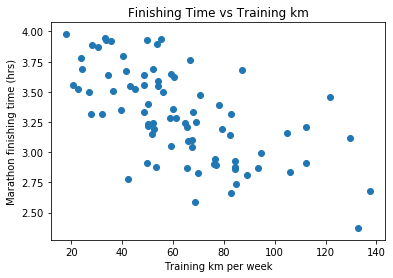

In [4]:
plt.scatter(
    x = df['km4week'],
    y = df['MarathonTime']   
)

plt.ylabel('Marathon finishing time (hrs)')
plt.xlabel("Training km per week")
plt.title('Finishing Time vs Training km')
plt.show()

This scatterplot shows the amount of kilometers that was ran per week in training and the marathon finishing time. It shows a positive corelation between the longer the weeking training distance the faster the time. 

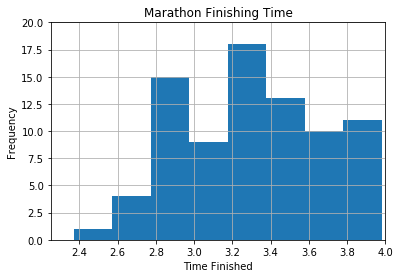

In [5]:
df.hist(['MarathonTime'], bins = 8)
plt.xlim([2.25,4])
plt.ylim([0,20])
plt.title("Marathon Finishing Time")
plt.xlabel("Time Finished")
plt.ylabel("Frequency")
plt.show()

In [ ]:
This histogram shows the the frequency of finishing times of the runners. 

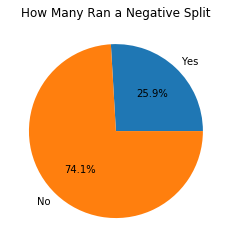

In [8]:
df['second_split'] = df['MarathonTime'] - df['Wall21']

yes = 0
no = 0
negative_split = {'Yes':yes, 'No':no}

for split, half_time in zip(df['second_split'], df['Wall21']):
    if half_time > split:
        negative_split['Yes'] += 1
    else:
        negative_split['No'] += 1

plt.pie(negative_split.values(), labels = negative_split.keys(), autopct='%1.1f%%')
plt.title('How Many Ran a Negative Split')
plt.show()

A negative split is when the second half of the race was done faster than the first half. In a marathon it is hard to do. This pie chart shows the percentage of runners that were able to do a negative split.

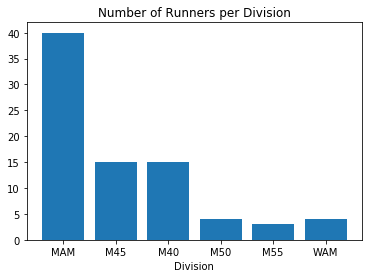

In [7]:
group = {}

for category in df['Category']:
    if category in group:
        group[category] += 1
    else:
        group[category] = 1

plt.bar(group.keys(), group.values())
plt.xlabel("Division")
plt.title("Number of Runners per Division")
plt.show()

This bar chart shows the amount of runners in each division. 